In [1]:
import pandas as pd

In [2]:
folder='C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/AI데이터연구단/뇌파 및 수면상태 연구/Wearable/삼성헬스/samsunghealth_goodcha46_202111011406/필요/'
df1=pd.read_csv(folder+'com.samsung.health.device_profile.202111011406.csv',encoding='utf-8',skiprows=1)

In [3]:
df2=pd.read_csv(folder+'com.samsung.health.ecg.202111011406.csv',encoding='utf-8',skiprows=1)
df3=pd.read_csv(folder+'com.samsung.health.floors_climbed.202111011406.csv',encoding='utf-8',skiprows=1)
df4=pd.read_csv(folder+'com.samsung.health.nutrition.202111011406.csv',encoding='utf-8',skiprows=1)
df5=pd.read_csv(folder+'com.samsung.health.weight.202111011406.csv',encoding='utf-8',skiprows=1)
df6=pd.read_csv(folder+'com.samsung.shealth.activity_level.202111011406.csv',encoding='utf-8',skiprows=1)
df7=pd.read_csv(folder+'com.samsung.shealth.activity.day_summary.202111011406.csv',encoding='utf-8',skiprows=1)
df8=pd.read_csv(folder+'com.samsung.shealth.blood_pressure.202111011406.csv',encoding='utf-8',skiprows=1)
df9=pd.read_csv(folder+'com.samsung.shealth.caloric_balance_goal.202111011406.csv',encoding='utf-8',skiprows=1)
df10=pd.read_csv(folder+'com.samsung.shealth.calories_burned.details.202111011406.csv',encoding='utf-8',skiprows=1)
df11=pd.read_csv(folder+'com.samsung.shealth.exercise.202111011406.csv',encoding='utf-8',skiprows=1)
df12=pd.read_csv(folder+'com.samsung.shealth.food_frequent.202111011406.csv',encoding='utf-8',skiprows=1)
df13=pd.read_csv(folder+'com.samsung.shealth.food_goal.202111011406.csv',encoding='utf-8',skiprows=1)
df14=pd.read_csv(folder+'com.samsung.shealth.goal.202111011406.csv',encoding='utf-8',skiprows=1)
df15=pd.read_csv(folder+'com.samsung.shealth.step_daily_trend.202111011406.csv',encoding='utf-8',skiprows=1)
df16=pd.read_csv(folder+'com.samsung.shealth.tracker.heart_rate.202111011406.csv',encoding='utf-8',skiprows=1)
df17=pd.read_csv(folder+'com.samsung.shealth.tracker.oxygen_saturation.202111011406.csv',encoding='utf-8',skiprows=1)
df18=pd.read_csv(folder+'com.samsung.shealth.tracker.pedometer_day_summary.202111011406.csv',encoding='utf-8',skiprows=1)
df19=pd.read_csv(folder+'com.samsung.shealth.tracker.pedometer_step_count.202111011406.csv',encoding='utf-8',skiprows=1)



In [4]:
#sleep과 관련된 파일들 추출
sleep_stage=pd.read_csv(folder+'com.samsung.health.sleep_stage.202111011406.csv',encoding='utf-8',header=1)
sleep_combined=pd.read_csv(folder+'com.samsung.shealth.sleep_combined.202111011406.csv',encoding='utf-8',skiprows=1) #9개
sleep_data=pd.read_csv(folder+'com.samsung.shealth.sleep_data.202111011406.csv',encoding='utf-8',skiprows=1) #2개
sleep_snoring=pd.read_csv(folder+'com.samsung.shealth.sleep_snoring.202111011406.csv',encoding='utf-8',skiprows=1) 
sleep=pd.read_csv(folder+'com.samsung.shealth.sleep.202111011406.csv',encoding='utf-8',skiprows=1)

In [5]:
# 인덱스 명 변경
sleep_stage=sleep_stage.reset_index()
sleep_stage=sleep_stage.shift(periods=1,axis=1)
sleep_combined=sleep_combined.reset_index()
sleep_combined=sleep_combined.shift(periods=1,axis=1)
sleep_data=sleep_data.reset_index()
sleep_data=sleep_data.shift(periods=1,axis=1)
sleep_snoring=sleep_snoring.reset_index()
sleep_snoring=sleep_snoring.shift(periods=1,axis=1)
sleep=sleep.reset_index()
sleep=sleep.shift(periods=1,axis=1)

In [6]:
#sleep에서의 start time명 변경
sleep.rename(columns={'com.samsung.health.sleep.start_time':'start_time'},inplace=True)
#sleep

In [7]:
sleep_stage=sleep_stage.sort_values(by=['start_time'],axis=0)

In [8]:
type(sleep_stage["start_time"])
a=pd.to_datetime(sleep_stage["start_time"])
type(a)

pandas.core.series.Series

In [9]:
from datetime import datetime
pd.to_datetime(sleep_stage["start_time"])

0      2021-09-30 14:15:00
1      2021-09-30 14:31:00
11     2021-09-30 14:32:00
28     2021-09-30 14:48:00
16     2021-09-30 15:01:00
               ...        
1674   2021-10-31 20:58:00
1677   2021-10-31 20:59:00
1682   2021-10-31 21:11:00
1685   2021-10-31 21:24:00
1689   2021-10-31 21:44:00
Name: start_time, Length: 1873, dtype: datetime64[ns]

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [11]:
sleep_stage['change_time']=pd.to_datetime(sleep_stage['start_time'])

In [12]:
sleep_stage.head()

,index,start_time,sleep_id,custom,update_time,create_time,stage,time_offset,deviceuuid,pkg_name,end_time,datauuid,change_time
0,NaN,2021-09-30 14:15:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,NaN,2021-10-01 01:43:47.929,2021-10-01 01:43:47.929,40002,UTC+0900,6fPiwL19M5,com.sec.android.app.shealth,2021-09-30 14:31:00.000,28f708e2-f618-4746-9aac-07fcffedb2b0,2021-09-30 14:15:00
1,NaN,2021-09-30 14:31:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,NaN,2021-10-01 01:43:47.944,2021-10-01 01:43:47.944,40001,UTC+0900,6fPiwL19M5,com.sec.android.app.shealth,2021-09-30 14:32:00.000,c0d1a5c0-4d38-4d40-ac65-4777f886e84b,2021-09-30 14:31:00
11,NaN,2021-09-30 14:32:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,NaN,2021-10-01 01:43:47.987,2021-10-01 01:43:47.987,40002,UTC+0900,6fPiwL19M5,com.sec.android.app.shealth,2021-09-30 14:48:00.000,6942b41c-95e0-4fdf-8a87-0dce28752933,2021-09-30 14:32:00
28,NaN,2021-09-30 14:48:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,NaN,2021-10-01 01:43:48.013,2021-10-01 01:43:48.013,40003,UTC+0900,6fPiwL19M5,com.sec.android.app.shealth,2021-09-30 15:01:00.000,245f78f5-8e21-48a7-97ad-dfcf5f0c97a1,2021-09-30 14:48:00
16,NaN,2021-09-30 15:01:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,NaN,2021-10-01 01:43:48.043,2021-10-01 01:43:48.043,40002,UTC+0900,6fPiwL19M5,com.sec.android.app.shealth,2021-09-30 15:06:00.000,c7510319-4992-4ae2-bf10-42e58649ad5f,2021-09-30 15:01:00


In [13]:
sleep_stage['change_time']

0      2021-09-30 14:15:00
1      2021-09-30 14:31:00
11     2021-09-30 14:32:00
28     2021-09-30 14:48:00
16     2021-09-30 15:01:00
               ...        
1674   2021-10-31 20:58:00
1677   2021-10-31 20:59:00
1682   2021-10-31 21:11:00
1685   2021-10-31 21:24:00
1689   2021-10-31 21:44:00
Name: change_time, Length: 1873, dtype: datetime64[ns]

In [14]:
sleep_stage['change_time'] = pd.DatetimeIndex(sleep_stage['change_time']) + timedelta(hours=9)

In [15]:
sleep_stage['change_time']

0      2021-09-30 23:15:00
1      2021-09-30 23:31:00
11     2021-09-30 23:32:00
28     2021-09-30 23:48:00
16     2021-10-01 00:01:00
               ...        
1674   2021-11-01 05:58:00
1677   2021-11-01 05:59:00
1682   2021-11-01 06:11:00
1685   2021-11-01 06:24:00
1689   2021-11-01 06:44:00
Name: change_time, Length: 1873, dtype: datetime64[ns]

In [16]:
sleep_stage=sleep_stage[["start_time","change_time","end_time","sleep_id","stage","datauuid"]]
sleep_stage=sleep_stage.set_index("change_time")
sleep_stage

,start_time,end_time,sleep_id,stage,datauuid
change_time,,,,,
2021-09-30 23:15:00,2021-09-30 14:15:00.000,2021-09-30 14:31:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,40002,28f708e2-f618-4746-9aac-07fcffedb2b0
2021-09-30 23:31:00,2021-09-30 14:31:00.000,2021-09-30 14:32:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,40001,c0d1a5c0-4d38-4d40-ac65-4777f886e84b
2021-09-30 23:32:00,2021-09-30 14:32:00.000,2021-09-30 14:48:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,40002,6942b41c-95e0-4fdf-8a87-0dce28752933
2021-09-30 23:48:00,2021-09-30 14:48:00.000,2021-09-30 15:01:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,40003,245f78f5-8e21-48a7-97ad-dfcf5f0c97a1
2021-10-01 00:01:00,2021-09-30 15:01:00.000,2021-09-30 15:06:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,40002,c7510319-4992-4ae2-bf10-42e58649ad5f
...,...,...,...,...,...
2021-11-01 05:58:00,2021-10-31 20:58:00.000,2021-10-31 20:59:00.000,9efd7639-0ac6-4f4e-9f78-4694ae5c9578,40001,ebee3359-cc1c-4470-bb20-a7ecaca18ef4
2021-11-01 05:59:00,2021-10-31 20:59:00.000,2021-10-31 21:11:00.000,9efd7639-0ac6-4f4e-9f78-4694ae5c9578,40002,f8285120-4148-4307-9742-138e0e6591ad
2021-11-01 06:11:00,2021-10-31 21:11:00.000,2021-10-31 21:15:00.000,9efd7639-0ac6-4f4e-9f78-4694ae5c9578,40001,2e3e8ea3-cc06-4bf2-8e15-21d113734f5a


In [17]:
select_stage=sleep_stage['2021-09-30':'2021-10-02']

In [18]:
y=select_stage.stage
x=select_stage.index

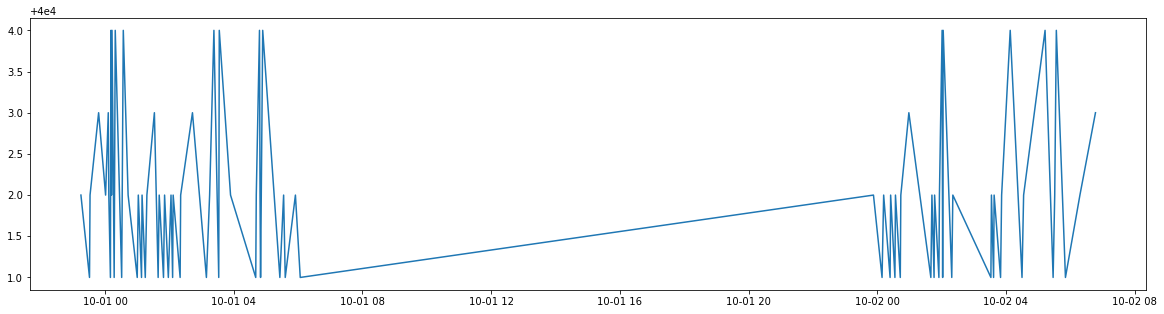

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.show()